In [1]:
# importing the modules or libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
# reading the csv file
df = pd.read_csv('../downloads/audible/audible_uncleaned.csv')

In [3]:
# checking the first 10 rows
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [4]:
# checking the shape of our dataset
df.shape
print('Number of columns', df.shape[1])
print('Number of rows', df.shape[0])

Number of columns 8
Number of rows 87489


In [5]:
# checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Data Cleaning steps

- Changing of columns headers to proper case
- Changing the datatypes (time, releasedate and price)
- Clean author and narrator columns
- Spliting the stars column into Stars and Ratings
- Change the new column's datatype

In [6]:
# Changing the column headers to proper case
df.columns = df.columns.str.title()

In [7]:
# Renamed the time column to time_mins
df.rename({"Time":"Time_mins"},axis=1, inplace=True)

In [8]:
# Function to convert time strings to minutes
def convert_to_minutes(time_str):
    parts = time_str.split('and')
    hours_minutes = [part.strip().split() for part in parts]
    total_minutes = 0
    for part in hours_minutes:
        if 'hrs' in part[1]:
            total_minutes += int(part[0]) * 60
        elif 'mins' in part[1]:
            total_minutes += int(part[0])
    return total_minutes

# Convert 'Time_mins' column to minutes
df['Time_mins'] = df['Time_mins'].apply(convert_to_minutes)
 

In [9]:
# Checking the effectiveness of the conversion
df.head(5)

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [10]:
# Convert 'Releasedate' column to datetime
df['Releasedate'] = pd.to_datetime(df['Releasedate'], format='%d-%m-%y')

In [11]:
# checking the datatype of release date
df.dtypes

Name                   object
Author                 object
Narrator               object
Time_mins               int64
Releasedate    datetime64[ns]
Language               object
Stars                  object
Price                  object
dtype: object

In [12]:
# Convert 'Price' column to float
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [13]:
# checking the datatype
df.dtypes

Name                   object
Author                 object
Narrator               object
Time_mins               int64
Releasedate    datetime64[ns]
Language               object
Stars                  object
Price                 float64
dtype: object

In [14]:
# printing out the author column
df["Author"]

0        Writtenby:GeronimoStilton
1            Writtenby:RickRiordan
2             Writtenby:JeffKinney
3            Writtenby:RickRiordan
4            Writtenby:RickRiordan
                   ...            
87484       Writtenby:ChrisStewart
87485      Writtenby:StephenO'Shea
87486          Writtenby:MarkTwain
87487     Writtenby:LaurenceSterne
87488      Writtenby:MarkKurlansky
Name: Author, Length: 87489, dtype: object

In [15]:
# Stripping the written by from the Authors column
df["Author"] =df["Author"].str.strip("Writtenby: ")
df["Author"]

0        GeronimoStilto
1            RickRiorda
2                 JeffK
3            RickRiorda
4            RickRiorda
              ...      
87484        ChrisStewa
87485     StephenO'Shea
87486           MarkTwa
87487         LaurenceS
87488      MarkKurlansk
Name: Author, Length: 87489, dtype: object

In [16]:
# printing out the narrator column
df["Narrator"]

0            Narratedby:BillLobely
1         Narratedby:RobbieDaymond
2            Narratedby:DanRussell
3        Narratedby:SoneelaNankani
4        Narratedby:JesseBernstein
                   ...            
87484      Narratedby:ChrisStewart
87485        Narratedby:RobertFass
87486         Narratedby:FloGibson
87487       Narratedby:AntonLesser
87488       Narratedby:FleetCooper
Name: Narrator, Length: 87489, dtype: object

In [17]:
# Stripping the narrated by from the Narrators column
df["Narrator"] =df["Narrator"].str.strip("Narratedby: ")
df["Narrator"]

0             BillLobel
1          RobbieDaymon
2            DanRussell
3        SoneelaNankani
4        JesseBernstein
              ...      
87484         ChrisStew
87485        RobertFass
87486         FloGibson
87487         AntonLess
87488         FleetCoop
Name: Narrator, Length: 87489, dtype: object

In [18]:
#cheking the dataset to see the effect of our stripping
df.head(5)

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5 out of 5 stars34 ratings,468.0
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5 out of 5 stars41 ratings,820.0
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5 out of 5 stars38 ratings,410.0
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5 out of 5 stars12 ratings,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5 out of 5 stars181 ratings,820.0


In [19]:
# Spillting stars column into stars and ratings 
df[['Stars', 'Ratings']] = df['Stars'].str.split(' stars', expand=True)
df

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price,Ratings
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5 out of 5,468.0,34 ratings
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5 out of 5,820.0,41 ratings
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5 out of 5,410.0,38 ratings
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5 out of 5,615.0,12 ratings
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5 out of 5,820.0,181 ratings
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewa,ChrisStew,454,2017-03-09,English,Not rated yet,596.0,None
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,Not rated yet,820.0,None
87486,The Innocents Abroad,MarkTwa,FloGibson,1144,2016-12-30,English,Not rated yet,938.0,None
87487,A Sentimental Journey,LaurenceS,AntonLess,248,2011-02-23,English,Not rated yet,680.0,None


In [20]:
# Stripping the ratings(word) from the Ratings column
df["Ratings"] =df["Ratings"].str.strip(" ratings")
df["Ratings"]

0          34
1          41
2          38
3          12
4         181
         ... 
87484    None
87485    None
87486    None
87487    None
87488    None
Name: Ratings, Length: 87489, dtype: object

In [21]:
# Checking the change effected
df.head(10)

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price,Ratings
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5 out of 5,468.0,34
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5 out of 5,820.0,41
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5 out of 5,410.0,38
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5 out of 5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5 out of 5,820.0,181
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslan,635,2018-10-30,English,5 out of 5,656.0,72
6,Quest for the Diamond Sword,Morga,LukeDaniels,143,2014-11-25,English,5 out of 5,233.0,11
7,The Dark Prophecy,RickRiorda,RobbieDaymon,752,2017-05-02,English,5 out of 5,820.0,50
8,Merlin Mission Collection,MaryPopeOsbo,MaryPopeOsborn,656,2017-05-02,English,5 out of 5,NaN,5
9,The Tyrant’s Tomb,RickRiorda,RobbieDaymon,802,2019-09-24,English,5 out of 5,820.0,58


In [22]:
# Cnverting Ratings(Object) to an integer 
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Ratings'] = df['Ratings'].fillna(0).astype(int)
df['Ratings']

0         34
1         41
2         38
3         12
4        181
        ... 
87484      0
87485      0
87486      0
87487      0
87488      0
Name: Ratings, Length: 87489, dtype: int32

In [23]:
# Checking the dataset to see the change in datatype
df.head(10)

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price,Ratings
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5 out of 5,468.0,34
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5 out of 5,820.0,41
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5 out of 5,410.0,38
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5 out of 5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5 out of 5,820.0,181
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslan,635,2018-10-30,English,5 out of 5,656.0,72
6,Quest for the Diamond Sword,Morga,LukeDaniels,143,2014-11-25,English,5 out of 5,233.0,11
7,The Dark Prophecy,RickRiorda,RobbieDaymon,752,2017-05-02,English,5 out of 5,820.0,50
8,Merlin Mission Collection,MaryPopeOsbo,MaryPopeOsborn,656,2017-05-02,English,5 out of 5,NaN,5
9,The Tyrant’s Tomb,RickRiorda,RobbieDaymon,802,2019-09-24,English,5 out of 5,820.0,58


In [24]:
# Splitting the stars column to do away with the "Out of 5"
df[['Stars', 'Example']] = df['Stars'].str.split(' out of 5', expand=True)
df

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price,Ratings,Example
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5,468.0,34,
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5,820.0,41,
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5,410.0,38,
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5,615.0,12,
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5,820.0,181,
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewa,ChrisStew,454,2017-03-09,English,Not rated yet,596.0,0,None
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,Not rated yet,820.0,0,None
87486,The Innocents Abroad,MarkTwa,FloGibson,1144,2016-12-30,English,Not rated yet,938.0,0,None
87487,A Sentimental Journey,LaurenceS,AntonLess,248,2011-02-23,English,Not rated yet,680.0,0,None


In [25]:
# Calling out our Star column
df['Stars']

0                    5
1                  4.5
2                  4.5
3                  4.5
4                  4.5
             ...      
87484    Not rated yet
87485    Not rated yet
87486    Not rated yet
87487    Not rated yet
87488    Not rated yet
Name: Stars, Length: 87489, dtype: object

In [26]:
# Converting Stars(Object) to float
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df['Stars'] = df['Stars'].fillna(0).astype(float)
df['Stars']

0        5.0
1        4.5
2        4.5
3        4.5
4        4.5
        ... 
87484    0.0
87485    0.0
87486    0.0
87487    0.0
87488    0.0
Name: Stars, Length: 87489, dtype: float64

In [27]:
# dropping or removing the Example column created earlier
df = df.drop(columns=['Example'])

In [28]:
# Calling out our dataframe to see the effect of the dropped column
df

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price,Ratings
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5.0,468.0,34
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5,820.0,41
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5,410.0,38
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5,820.0,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewa,ChrisStew,454,2017-03-09,English,0.0,596.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,0.0,820.0,0
87486,The Innocents Abroad,MarkTwa,FloGibson,1144,2016-12-30,English,0.0,938.0,0
87487,A Sentimental Journey,LaurenceS,AntonLess,248,2011-02-23,English,0.0,680.0,0


In [29]:
# Checking the first 5 in the dataframe
df.head(5)

,Name,Author,Narrator,Time_mins,Releasedate,Language,Stars,Price,Ratings
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5.0,468.0,34
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5,820.0,41
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5,410.0,38
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5,820.0,181


In [30]:
# Renamed the Releasedate column to "Release_date" and Ratings to "Total_rating"
df.rename({"Releasedate":"Release_date","Ratings":"Total_rating"},axis=1, inplace=True)
df

,Name,Author,Narrator,Time_mins,Release_date,Language,Stars,Price,Total_rating
0,Geronimo Stilton #11 & #12,GeronimoStilto,BillLobel,140,2008-08-04,English,5.0,468.0,34
1,The Burning Maze,RickRiorda,RobbieDaymon,788,2018-05-01,English,4.5,820.0,41
2,The Deep End,JeffK,DanRussell,123,2020-11-06,English,4.5,410.0,38
3,Daughter of the Deep,RickRiorda,SoneelaNankani,676,2021-10-05,English,4.5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiorda,JesseBernstein,600,2010-01-13,English,4.5,820.0,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewa,ChrisStew,454,2017-03-09,English,0.0,596.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,0.0,820.0,0
87486,The Innocents Abroad,MarkTwa,FloGibson,1144,2016-12-30,English,0.0,938.0,0
87487,A Sentimental Journey,LaurenceS,AntonLess,248,2011-02-23,English,0.0,680.0,0


In [31]:
def separate_and_format_name(name):
    formatted_name = ''
    for char in name:
        if char.isupper() and formatted_name:
            formatted_name += ' ' + char
        else:
            formatted_name += char
    return formatted_name

# Apply the function to 'Author' column
df['Author'] = df['Author'].apply(separate_and_format_name)
df['Narrator'] = df['Narrator'].apply(separate_and_format_name)
df

,Name,Author,Narrator,Time_mins,Release_date,Language,Stars,Price,Total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilto,Bill Lobel,140,2008-08-04,English,5.0,468.0,34
1,The Burning Maze,Rick Riorda,Robbie Daymon,788,2018-05-01,English,4.5,820.0,41
2,The Deep End,Jeff K,Dan Russell,123,2020-11-06,English,4.5,410.0,38
3,Daughter of the Deep,Rick Riorda,Soneela Nankani,676,2021-10-05,English,4.5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riorda,Jesse Bernstein,600,2010-01-13,English,4.5,820.0,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewa,Chris Stew,454,2017-03-09,English,0.0,596.0,0
87485,The Alps,Stephen O' Shea,Robert Fass,607,2017-02-21,English,0.0,820.0,0
87486,The Innocents Abroad,Mark Twa,Flo Gibson,1144,2016-12-30,English,0.0,938.0,0
87487,A Sentimental Journey,Laurence S,Anton Less,248,2011-02-23,English,0.0,680.0,0


In [80]:
df.dropna(subset=['Price'], inplace=True)

In [81]:
# Calculating average duration
average_duration = np.mean(df['Time_mins'])
average_duration

361.30906876882653

In [82]:
# Calculating median duration
median_duration = np.median(df['Time_mins'])
median_duration

352.0

In [83]:
# Calculating minimum duration
minimum_duration = np.min(df['Time_mins'])
minimum_duration

0

In [84]:
# Calculating maximum duration
maximum_duration = np.max(df['Time_mins'])
maximum_duration

6139

In [85]:
# Calculate summary statistics for prices
mean_price = np.mean(df['Price'])
median_price = np.median(df['Price'])
min_price = np.min(df['Price'])
max_price = np.max(df['Price'])


In [86]:
# Printing summary statistics for prices
print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)


Mean Price: 487.9754784336346
Median Price: 501.0
Minimum Price: 11.0
Maximum Price: 999.0


In [87]:
# Count occurrences of each author
author_counts = df['Author'].value_counts()

# Get the author with the most audiobooks (assuming unique most frequent author)
most_prolific_author = author_counts.idxmax()

# Get the number of audiobooks by the most prolific author
num_audiobooks = author_counts.max()

print(f"Author with the most audiobooks: {most_prolific_author} ({num_audiobooks} audiobooks)")
print(num_audiobooks)

Author with the most audiobooks: 矢島雅弘,石橋遊 (874 audiobooks)
874


In [88]:
# Authors with the most audiobooks
top_5_authors = df.groupby("Author")["Name"].count()
top_5_authors = top_5_authors.sort_values(ascending=False).head(5)
top_5_audiobook = top_5_authors.to_frame()
top_5_audiobook

,Name
Author,
"矢島雅弘,石橋遊",874
Smart Reading,405
"中西貴之, B J",311
div.,268
Online Studio Productions,212


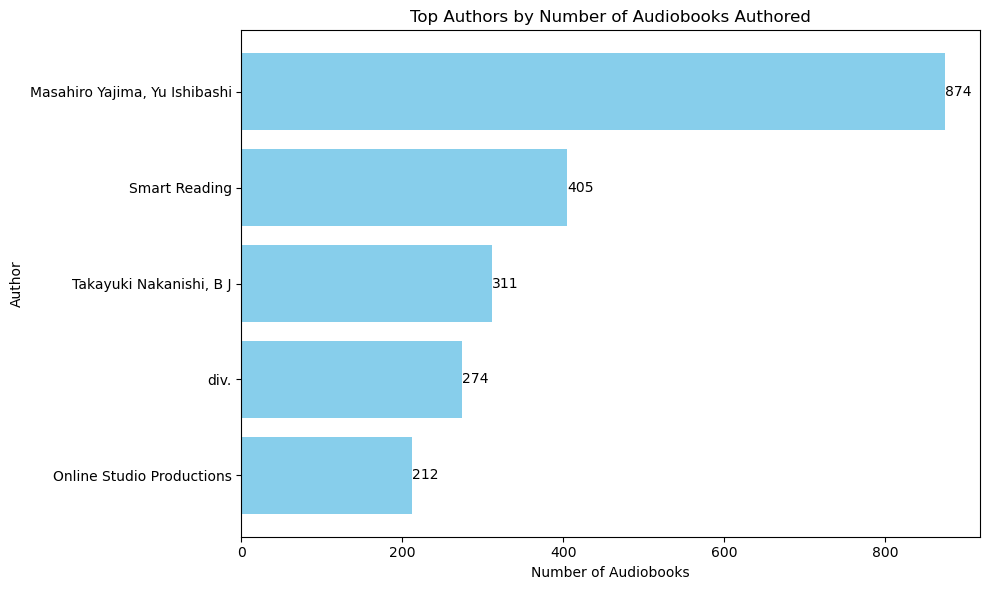

In [89]:
# Visualizing the authors with the most audiobooks
Author = ['Masahiro Yajima, Yu Ishibashi', 'Smart Reading', 'Takayuki Nakanishi, B J', 'div.', 'Online Studio Productions']
Name = [874, 405, 311, 274, 212]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(Author, Name, color='skyblue')

# Add data labels with commas
for bar, value in zip(bars, Name):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:,}', ha='left', va='center')

plt.xlabel('Number of Audiobooks')
plt.ylabel('Author')
plt.title('Top Authors by Number of Audiobooks Authored')
plt.gca().invert_yaxis()  # Invert y-axis to display the author with the highest count at the top
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [90]:
plt.savefig('my_plot.jpeg')

<Figure size 640x480 with 0 Axes>

In [91]:
plt.close()

In [92]:
# Narrators of the most audiobooks
top_5_narrators = df.groupby("Narrator")["Name"].count()
top_5_narrators = top_5_narrators.sort_values(ascending=False).head(5)
top_5_narrators = top_5_narrators.to_frame()
top_5_narrators

,Name
Narrator,
nonymous,1034
"矢島雅弘,石橋遊",874
Intuitiv,465
uncredi,324
"中西貴之, B J",311


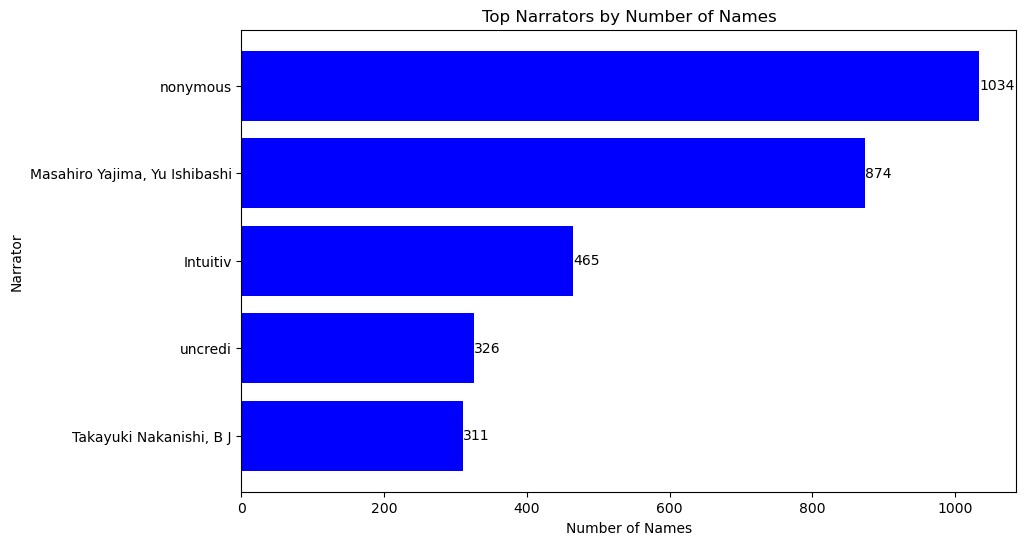

In [93]:
Narrator = ['nonymous', 'Masahiro Yajima, Yu Ishibashi', 'Intuitiv', 'uncredi', 'Takayuki Nakanishi, B J']
Name = [1034, 874, 465, 326, 311]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(Narrator, Name, color='blue')

# Adding data labels
for bar, count in zip(bars, Name):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), ha='left', va='center', fontsize=10)

plt.xlabel('Number of Names')
plt.ylabel('Narrator')
plt.title('Top Narrators by Number of Names')
plt.gca().invert_yaxis()  # Invert y-axis to display the narrator with the highest count at the top
plt.show()

In [94]:
# Saving the figure
plt.savefig('top_narrators_bar_chart.png')

<Figure size 640x480 with 0 Axes>

In [95]:
# Relationship between Time in minutes and Price of the  audiobooks
time_price_rlship = df.groupby("Price")["Time_mins"].max()
time_price_rlship = time_price_rlship.sort_values(ascending=False).head(10)
time_price_rlship = time_price_rlship.to_frame()
time_price_rlship

,Time_mins
Price,
401.0,6139
759.0,5913
434.0,5700
32.0,5264
703.0,5110
633.0,4991
469.0,4716
773.0,4399
820.0,4349


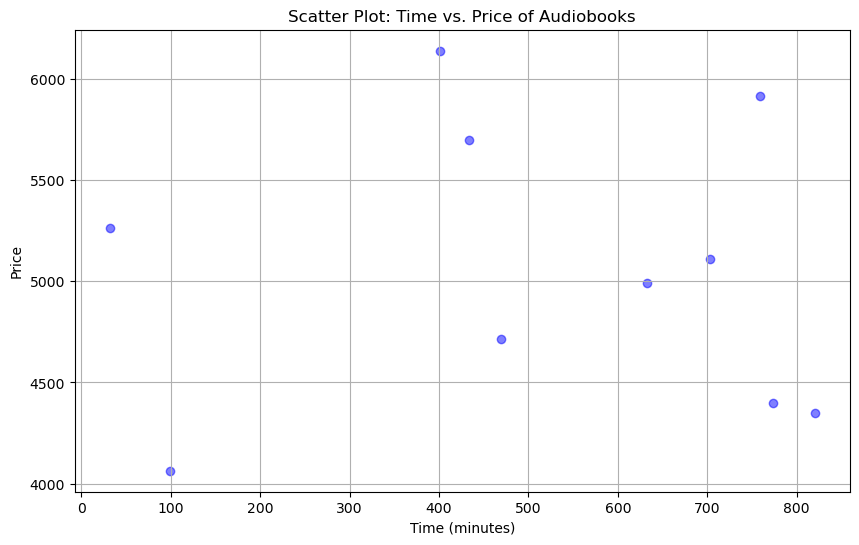

In [96]:
# Data
time_mins = [401.0, 759.0, 434.0, 32.0, 703.0, 633.0, 469.0, 773.0, 820.0, 99.0]
prices = [6139, 5913, 5700, 5264, 5110, 4991, 4716, 4399, 4349, 4064]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(time_mins, prices, color='blue', alpha=0.5)  # alpha controls transparency

plt.xlabel('Time (minutes)')
plt.ylabel('Price')
plt.title('Scatter Plot: Time vs. Price of Audiobooks')

plt.grid(True)  # Add gridlines for better readability
plt.show()

In [97]:
plt.savefig('scatter_plot_time_vs_price.png')

<Figure size 640x480 with 0 Axes>

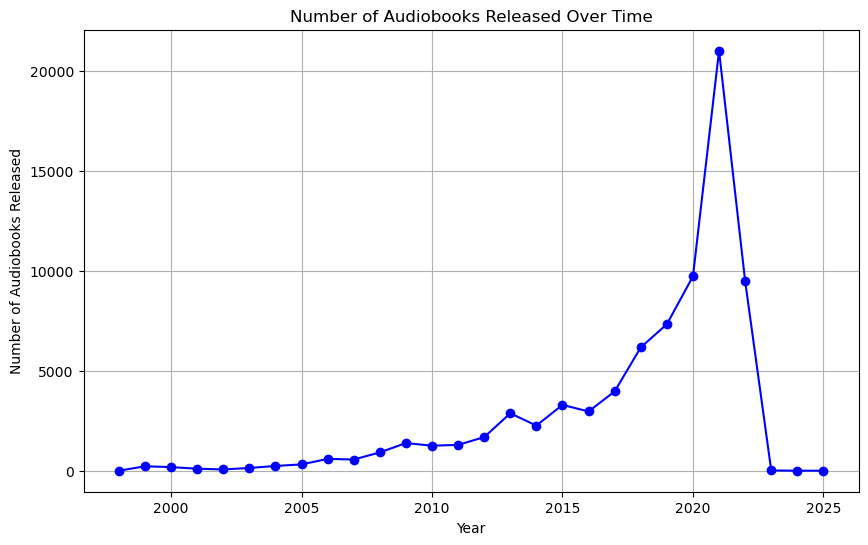

In [98]:
# Grouping by year and counting the number of audiobooks released each year
audiobooks_per_year = df.groupby(df['Release_date'].dt.year).size()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(audiobooks_per_year.index, audiobooks_per_year.values, marker='o', color='blue', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Number of Audiobooks Released')
plt.title('Number of Audiobooks Released Over Time')

plt.grid(True)  # Add gridlines for better readability

plt.show()

In [99]:
plt.savefig('number_of_audiobooks_released_over_time.png')

<Figure size 640x480 with 0 Axes>

In [100]:
#most translated language by audio book
audiobook = df["Language"].value_counts()
audiobook = audiobook.to_frame()
top_5_audiobook = audiobook.head(5)
top_5_audiobook

,count
Language,
English,53132
german,8199
spanish,3338
japanese,3038
italian,2652


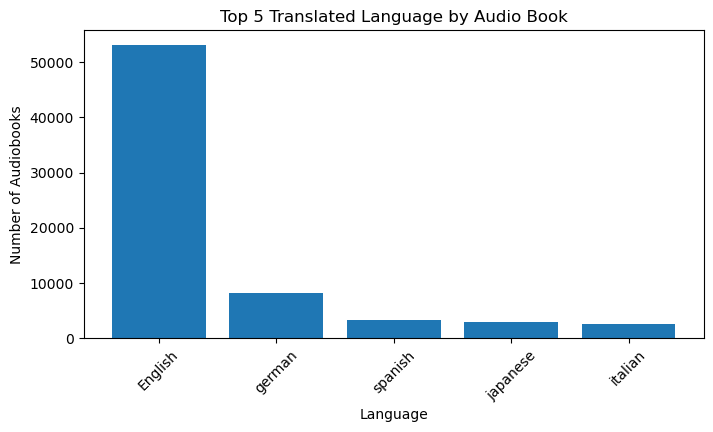

In [101]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_5_audiobook.index, top_5_audiobook['count'])
plt.xlabel('Language')
plt.ylabel('Number of Audiobooks')
plt.title('Top 5 Translated Language by Audio Book')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [102]:
df

,Name,Author,Narrator,Time_mins,Release_date,Language,Stars,Price,Total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilto,Bill Lobel,140,2008-08-04,English,5.0,468.0,34
1,The Burning Maze,Rick Riorda,Robbie Daymon,788,2018-05-01,English,4.5,820.0,41
2,The Deep End,Jeff K,Dan Russell,123,2020-11-06,English,4.5,410.0,38
3,Daughter of the Deep,Rick Riorda,Soneela Nankani,676,2021-10-05,English,4.5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riorda,Jesse Bernstein,600,2010-01-13,English,4.5,820.0,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewa,Chris Stew,454,2017-03-09,English,0.0,596.0,0
87485,The Alps,Stephen O' Shea,Robert Fass,607,2017-02-21,English,0.0,820.0,0
87486,The Innocents Abroad,Mark Twa,Flo Gibson,1144,2016-12-30,English,0.0,938.0,0
87487,A Sentimental Journey,Laurence S,Anton Less,248,2011-02-23,English,0.0,680.0,0


In [103]:
# Top 5 most expensive audiobooks
top_5_audiobook = df.groupby("Name")["Price"].max()
top_5_audiobook = top_5_audiobook.sort_values(ascending=False).head(5)
top_5_audiobook = top_5_audiobook.to_frame()
top_5_audiobook


,Price
Name,
"Harry Potter and the Prisoner of Azkaban, Book 3",999.0
"Harry Potter and the Chamber of Secrets, Book 2",999.0
"Harry Potter and the Philosopher's Stone, Book 1",999.0
The Enchiridion & Discourses,998.0
"Studies in the Psychology of Sex, Volume 1",998.0


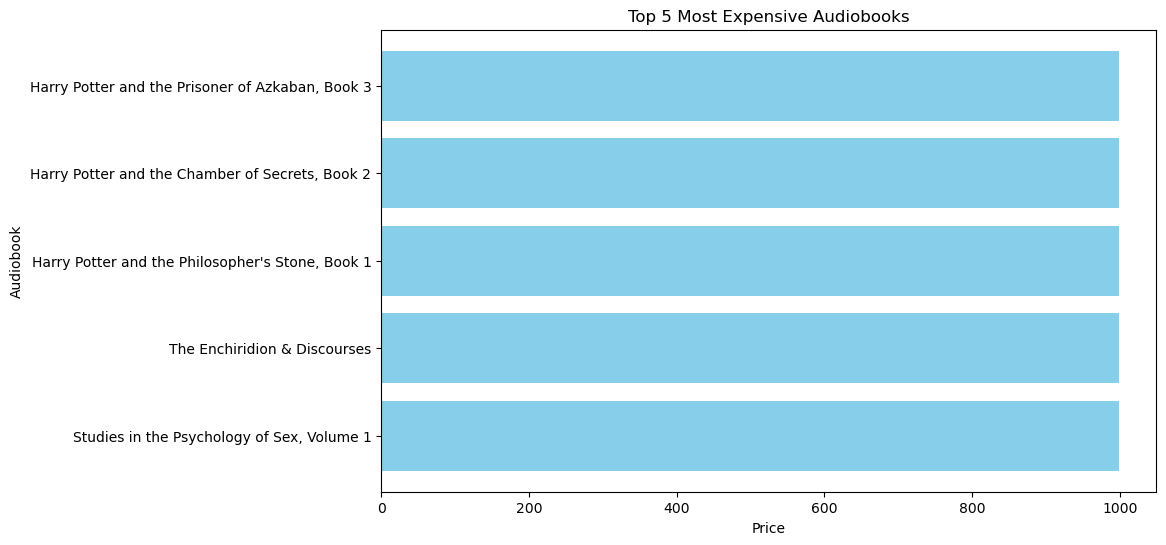

In [104]:
# Visualizing Top 5 most expensive audiobooks
names = [
    "Harry Potter and the Prisoner of Azkaban, Book 3",
    "Harry Potter and the Chamber of Secrets, Book 2",
    "Harry Potter and the Philosopher's Stone, Book 1",
    "The Enchiridion & Discourses",
    "Studies in the Psychology of Sex, Volume 1"
]
prices = [999.0, 999.0, 999.0, 998.0, 998.0]

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.barh(names, prices, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Audiobook')
plt.title('Top 5 Most Expensive Audiobooks')
plt.gca().invert_yaxis()  # Invert y-axis to display the most expensive audiobook at the top
plt.show()

In [105]:
# number of audio books released per year
audiobooks_per_year = df['Release_date'].dt.year.value_counts().sort_index()
audiobooks_per_year = audiobooks_per_year.to_frame()
audiobooks_per_year

,count
Release_date,
1998,2
1999,224
2000,183
2001,102
2002,65
2003,140
2004,240
2005,318
2006,593


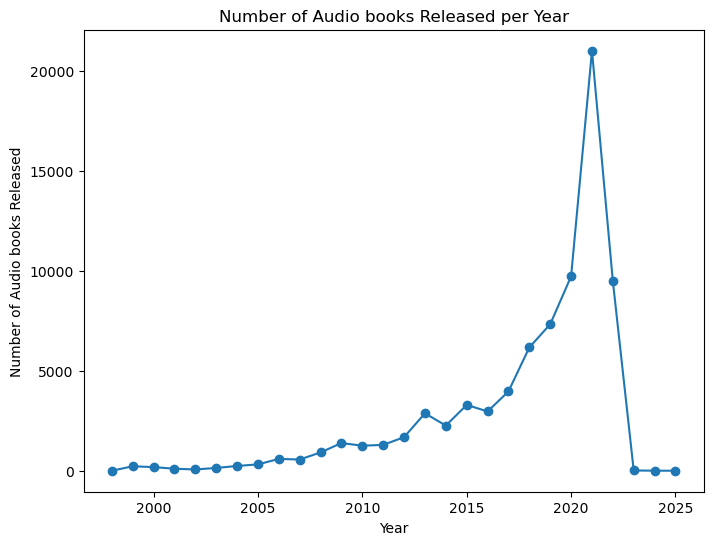

In [106]:
# Plotting the number of audiobooks released per year
plt.figure(figsize=(8, 6))
plt.plot(audiobooks_per_year.index, audiobooks_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Audio books Released')
plt.title('Number of Audio books Released per Year')

# Add grid lines
plt.grid(False)  
plt.show()

In [107]:
# averge listening time for top 5 listeners
average_time_per_listener = df.groupby('Name')['Time_mins'].mean()
average_time_per_listener = average_time_per_listener.sort_values(ascending=False)
average_time_per_listener = average_time_per_listener.to_frame()
average_time_per_listener.head(5)

,Time_mins
Name,
10 Masterpieces You Have to Read Before You Die 1,6139.0
The Catholic Audio Bible,5913.0
50 Self-Help Classics to Guide You to Financial Freedom,5700.0
Siri Guru Granth Sahib,5545.0
10 Essential Pieces of Literature,5264.0


## Machine Learning Models using the linear regression model

In [109]:
df

,Name,Author,Narrator,Time_mins,Release_date,Language,Stars,Price,Total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilto,Bill Lobel,140,2008-08-04,English,5.0,468.0,34
1,The Burning Maze,Rick Riorda,Robbie Daymon,788,2018-05-01,English,4.5,820.0,41
2,The Deep End,Jeff K,Dan Russell,123,2020-11-06,English,4.5,410.0,38
3,Daughter of the Deep,Rick Riorda,Soneela Nankani,676,2021-10-05,English,4.5,615.0,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riorda,Jesse Bernstein,600,2010-01-13,English,4.5,820.0,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewa,Chris Stew,454,2017-03-09,English,0.0,596.0,0
87485,The Alps,Stephen O' Shea,Robert Fass,607,2017-02-21,English,0.0,820.0,0
87486,The Innocents Abroad,Mark Twa,Flo Gibson,1144,2016-12-30,English,0.0,938.0,0
87487,A Sentimental Journey,Laurence S,Anton Less,248,2011-02-23,English,0.0,680.0,0


In [110]:
df['Price'].info()

<class 'pandas.core.series.Series'>
Index: 78015 entries, 0 to 87488
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
78015 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [111]:
df['Price'].describe()

count    78015.000000
mean       487.975478
std        255.136687
min         11.000000
25%        251.000000
50%        501.000000
75%        691.000000
max        999.000000
Name: Price, dtype: float64

In [141]:
# Separate features (X) and target variable (y)
X = df[['Price','Stars']]
y = df['Total_rating']

In [142]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#Instantiate the linear regression model
lr = LinearRegression()

In [144]:
#Train our linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [145]:
lr.predict(X_test)

array([ 0.05566021, -0.01459047,  0.10595331, ...,  0.02552427,
       -0.01459047, -0.00540998])

In [146]:
print("lr.coef_: {}\n".format(lr.coef_))

print("lr.intercept_: {}\n".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [1.99575800e-04 3.06138356e+00]

lr.intercept_: -0.06109163117664895

Training set score: 0.05
Test set score: 0.05
